<a href="https://colab.research.google.com/github/HeloBula/Python/blob/main/P1_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prova de IA**
Selecionei uma base de dados com a temática de predição de diabetes em mulheres com herança indígena Pima.

A base de dados está disponibilizada em [Dados Diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

# 1.**Pré-Processamento da Base de Dados**

Primeiramente carrego a base de dados para o formato *dataframe*

##1.Transformação dos atributos em valores numéricos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('diabetes.csv', header=0, sep=';')  # Certifique-se do separador correto

# Listas de colunas conforme o tipo desejado
colunas_inteiras = ['Pregnancies', 'Age', 'Outcome']
colunas_float = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

# Converter para inteiro
df[colunas_inteiras] = df[colunas_inteiras].apply(pd.to_numeric, errors='coerce').astype('Int64')

# Converter para float
df[colunas_float] = df[colunas_float].apply(pd.to_numeric, errors='coerce').astype(float)

# Verificando os tipos de dados
print(df.dtypes)


Pregnancies                   Int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           Int64
Outcome                       Int64
dtype: object


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Quantidade total de registros da base de dados:

In [ ]:
total_linhas = df.shape[0]
print(total_linhas)

769


##2.Verificação e tratamento de valores ausentes

### 2.1 - Contagem dos casos ausentes

In [ ]:
#Contagem de dados ausentes nas colunas
# Lista de colunas onde o valor 0 representa dado ausente
colunas_com_zero_como_ausente = ['SkinThickness', 'Insulin', 'BMI']

# Criar um DataFrame para armazenar os valores ausentes
df_ausentes = pd.DataFrame(index=df.columns, columns=['Total de Ausentes'])

# Contar valores ausentes normais (NaN) em todas as colunas
df_ausentes['Total de Ausentes'] = df.isna().sum()

# Somar os valores 0 como ausentes nas colunas específicas
for col in colunas_com_zero_como_ausente:
    df_ausentes.loc[col, 'Total de Ausentes'] += (df[col] == 0).sum()

# Ordenar do maior para o menor número de ausentes
df_ausentes.sort_values(by='Total de Ausentes', ascending=False, inplace=True)

# Exibir resultado
print(df_ausentes)

                          Total de Ausentes
Insulin                                 375
SkinThickness                           228
BMI                                      12
Pregnancies                               1
BloodPressure                             1
Glucose                                   1
DiabetesPedigreeFunction                  1
Age                                       1
Outcome                                   1


###2.2 - Tratamento dos valores ausentes encontrados

Os atributos que possuem poucos valores ausentes, como Pregnancies, BloodPressure, Glucose, DiabetesPedigreeFunction, Age e Outcome, serão mantidos e seus registros com dados faltantes serão excluídos, garantindo a integridade do conjunto de dados.

In [ ]:
# Definindo as colunas que possuem poucos valores ausentes
colunas_com_poucos_ausentes = ['Pregnancies', 'BloodPressure', 'Glucose', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

#Dados tratados
df_norm = df.copy()

# Removendo apenas os registros que possuem valores ausentes
df_norm = df.dropna(subset=colunas_com_poucos_ausentes)

# Definir as colunas que queremos analisar
colunas_ausentes = ['Glucose', 'BloodPressure', 'BMI', 'Insulin', 'SkinThickness']

# Remover registros onde há valores 0 nessas colunas
df_norm = df_norm[~df_norm[colunas_ausentes].eq(0).any(axis=1)]

# Contar os valores NaN
valores_nan = df_norm[colunas_ausentes].isna().sum()

# Contar os valores zero
valores_zero = (df_norm[colunas_ausentes] == 0).sum()

# Somar os valores ausentes (NaN + 0)
valores_ausentes_total = valores_nan + valores_zero

# Exibir os resultados
print("Quantidade de valores ausentes (NaN + 0):")
print(valores_ausentes_total)

# Somar o total geral de valores ausentes
total_ausentes = valores_ausentes_total.sum()
print(f"\nTotal de valores ausentes em todas as colunas analisadas: {total_ausentes}")

Quantidade de valores ausentes (NaN + 0):
Glucose          0
BloodPressure    0
BMI              0
Insulin          0
SkinThickness    0
dtype: int64

Total de valores ausentes em todas as colunas analisadas: 0


In [ ]:
total_linhas = df_norm.shape[0]
print(total_linhas)

392


Já os atributos 'Insulin' e 'SkinThickness' apresentam uma quantia significativa dos dados ausentes.

Para tratá-los, podemos utilizar uma medida de posição da coluna, entre as quais estão a média e a mediana.

In [ ]:
# Calculando a média e arredondando para 4 casas decimais
media_insulin = round(df_norm['Insulin'].mean(), 4)
media_skinthickness = round(df_norm['SkinThickness'].mean(), 4)

# Exibindo os valores formatados corretamente
print(f"Média do atributo Insulin: {media_insulin}")
print(f"Média do atributo SkinThickness: {media_skinthickness}")

#Calculando a mediana
mediana_insulin = df_norm['Insulin'].median()
mediana_skinthickness = df_norm['SkinThickness'].median()

# Exibindo os valores formatados
print(f"\nMediana do atributo Insulin: {mediana_insulin}")
print(f"Mediana do atributo SkinThickness: {mediana_skinthickness}")


Média do atributo Insulin: 156.0561
Média do atributo SkinThickness: 29.1454

Mediana do atributo Insulin: 125.5
Mediana do atributo SkinThickness: 29.0


O valor da mediana é o mais recomendado, uma vez que não é tão sensível à outliers como a média.

Podemos ainda calcular a mediana em relação aos grupos diabéticos e não diabéticos, pois a insulina e a espessura da pele podem ter padrões diferentes para cada grupo. Com isso, temos os valores preenchidos com base na tendência dentro do grupo definido.

In [ ]:
# Calculando a mediana de Insulin e SkinThickness para cada grupo de Outcome
mediana_insulin = df_norm.groupby('Outcome')['Insulin'].median()
mediana_skinthickness = df_norm.groupby('Outcome')['SkinThickness'].median()

print("Mediana de Insulin por grupo:\n", mediana_insulin)
print("\n")
print("Mediana de SkinThickness por grupo:\n", mediana_skinthickness)

Mediana de Insulin por grupo:
 Outcome
0    105.0
1    169.5
Name: Insulin, dtype: float64


Mediana de SkinThickness por grupo:
 Outcome
0    27.0
1    33.0
Name: SkinThickness, dtype: float64


In [ ]:
# Substituindo os valores NaN e 0 pela mediana do grupo correspondente de Outcome
df_norm['Insulin'] = df_norm.apply(lambda row: mediana_insulin[row['Outcome']] if pd.isna(row['Insulin']) or row['Insulin'] == 0 else row['Insulin'], axis=1)
df_norm['SkinThickness'] = df_norm.apply(lambda row: mediana_skinthickness[row['Outcome']] if pd.isna(row['SkinThickness']) or row['SkinThickness'] == 0 else row['SkinThickness'], axis=1)


# Definir as colunas que queremos analisar
colunas_ausentes = ['Glucose', 'BloodPressure', 'BMI', 'Insulin', 'SkinThickness']

# Contar os valores NaN
valores_nan = df_norm[colunas_ausentes].isna().sum()

# Contar os valores zero
valores_zero = (df_norm[colunas_ausentes] == 0).sum()

# Somar os valores ausentes (NaN + 0)
valores_ausentes_total = valores_nan + valores_zero

# Exibir os resultados
print("Quantidade de valores ausentes (NaN + 0):")
print(valores_ausentes_total)

# Somar o total geral de valores ausentes
total_ausentes = valores_ausentes_total.sum()
print(f"\nTotal de valores ausentes em todas as colunas analisadas: {total_ausentes}")

Quantidade de valores ausentes (NaN + 0):
Glucose          0
BloodPressure    0
BMI              0
Insulin          0
SkinThickness    0
dtype: int64

Total de valores ausentes em todas as colunas analisadas: 0


Resolvemos os dados faltantes

###2.3 - Verificando a ocorrência de dados duplicados

Conferimos se existem registros duplicados nos dados:

In [ ]:
# Verificando quantas linhas duplicadas
df_norm.loc[df_norm.duplicated()].shape

(0, 9)

Nossa base de dados está livre de dados duplicados

##**3. Visualizando a distribuição dos dados**



###3.1 - Analisando a correlação

In [ ]:
# Cálculo da correlação dos atributos
corr_reg = df_norm.corr(numeric_only = True)
corr_reg.style.background_gradient(cmap = 'coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


A partir do quadro podemos visualizar algumas relações entre os atributos:

* Como esperado, o nível de glucose no sangue é um dos principais fatores no
resultado final, representando uma correlação de aproximadamente 0,474; seguido pela influência da insulina em quase 0,516.
* Há uma relação entre o Índice de Massa Corporal e a gordura corporal (SkinThickness) que gira em torno de 0,664. Também podemos visualizar que a quantidade de insulina afeta a taxa de glucose em 0,581.
* Por fim, uma das correlações acontece entre a idade da mulher e a quantidade de gravidezes, acumulando um total de 0,679.

###3.2 - Analisando a distribuição através de Histogramas

Vou plotar histogramas e gráficos para visualizar a distribuição de dados com o objetivo de verificar possíveis *outliers*

**Pregnancies**

In [ ]:
max_pregnancies = df_norm['Pregnancies'].max()
print("Valor máximo de Pregnancies:", max_pregnancies)

Valor máximo de Pregnancies: 17


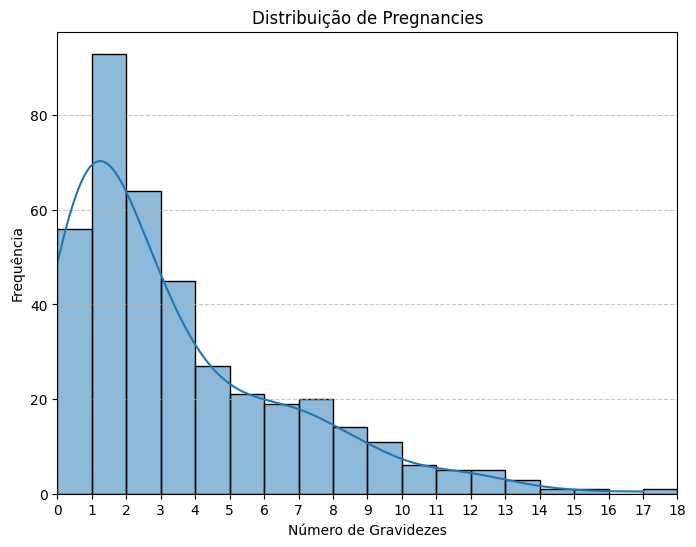

In [ ]:
plt.figure(figsize=(8, 6))

# Criando o histograma com a curva de densidade (kde=True)
sns.histplot(df_norm['Pregnancies'], kde=True, bins=range(0, 19, 1))  # Define bins inteiros de 0 a 18

# Ajustando os eixos
plt.xlim(0, 18)  # Define a escala do eixo X de 0 a 18
plt.xticks(range(0, 19, 1))  # Define ticks de 0 a 18

# Adicionando rótulos e título
plt.title('Distribuição de Pregnancies')
plt.xlabel('Número de Gravidezes')
plt.ylabel('Frequência')

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona uma grade para melhor visualização

plt.show()


**Idades**

In [ ]:
#ver o maior valor
max_age = df_norm['Age'].max()
print("Valor máximo de Age:", max_age)

min_age = df_norm['Age'].min()
print("Valor mínimo de Age:", min_age)

Valor máximo de Age: 81
Valor mínimo de Age: 21


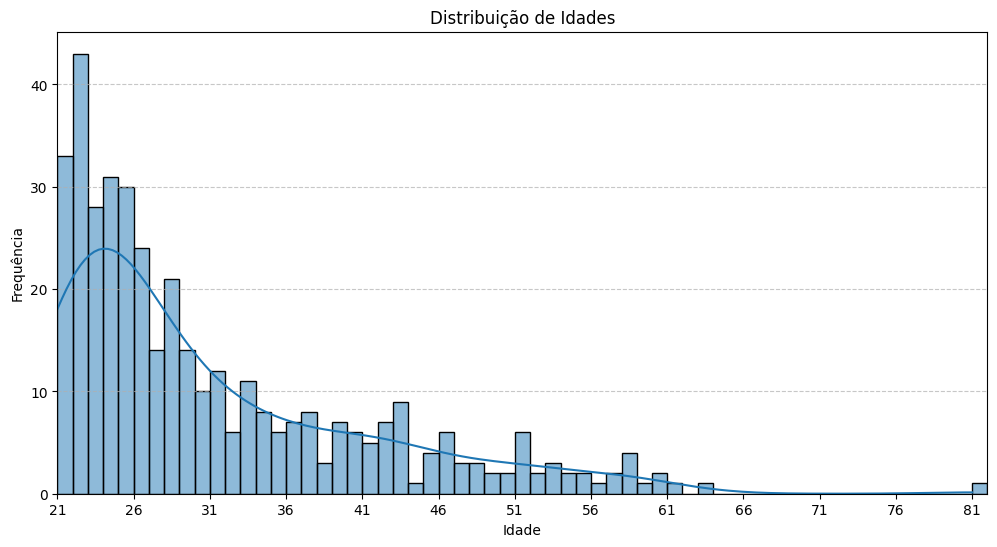

In [ ]:
plt.figure(figsize=(12, 6))  # Aumenta a largura do gráfico

# Criando o histograma com curva de densidade
sns.histplot(df_norm['Age'], kde=True, bins=range(21, 83, 1))  # Faixa ajustada

# Ajustando os eixos
plt.xlim(21, 82)  # Escala do eixo X
plt.xticks(range(21, 83, 5))  # Agora os ticks aparecem de 5 em 5 anos

# Adicionando rótulos e título
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona uma grade para facilitar a leitura

plt.show()

**Demais atributos**

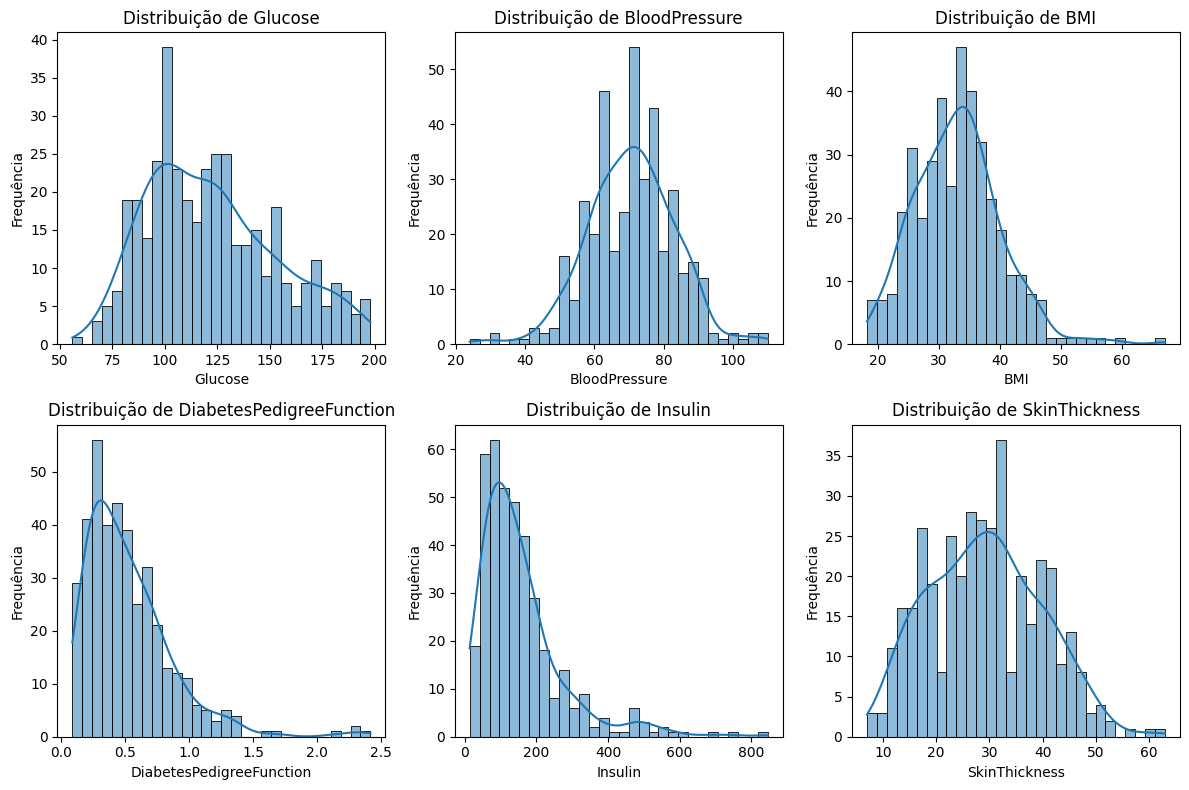

In [ ]:
# Lista de colunas numéricas para plotar histogramas
colunas_hist = ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness']

plt.figure(figsize=(12, 8))

for i, col in enumerate(colunas_hist, 1):
    plt.subplot(2, 3, i)  # Criando subplots (2 linhas, 3 colunas)
    sns.histplot(df_norm[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

Com os histogramas obtidos podemos observar que:

*   Glucose: A maior concentração de glucose acontece na faixa entre 80 e 125.
*   BloodPressure: As pressões arteriais possuem sua maior ocorrência entre 50 e 83.
*   BMI: A concentração dos valores acontece à esquerda do histograma, aproximadamente na faixa dos 23 aos 40.
*   DiabetesPedigreeFunction: Uma distribuição mais à esquerda, principalmente entre 0,1 à 0,4.
*   Insulina: O pico da frequência acontece aproximadamente dos 60 aos 90, declinando a partir desse ponto.
*   SkinThickness: O maior número ocorre na faixa dos 28 aos 32, representando quase o triplo de frequência das demais faixas.






###3.3 - Análise dos Boxplots

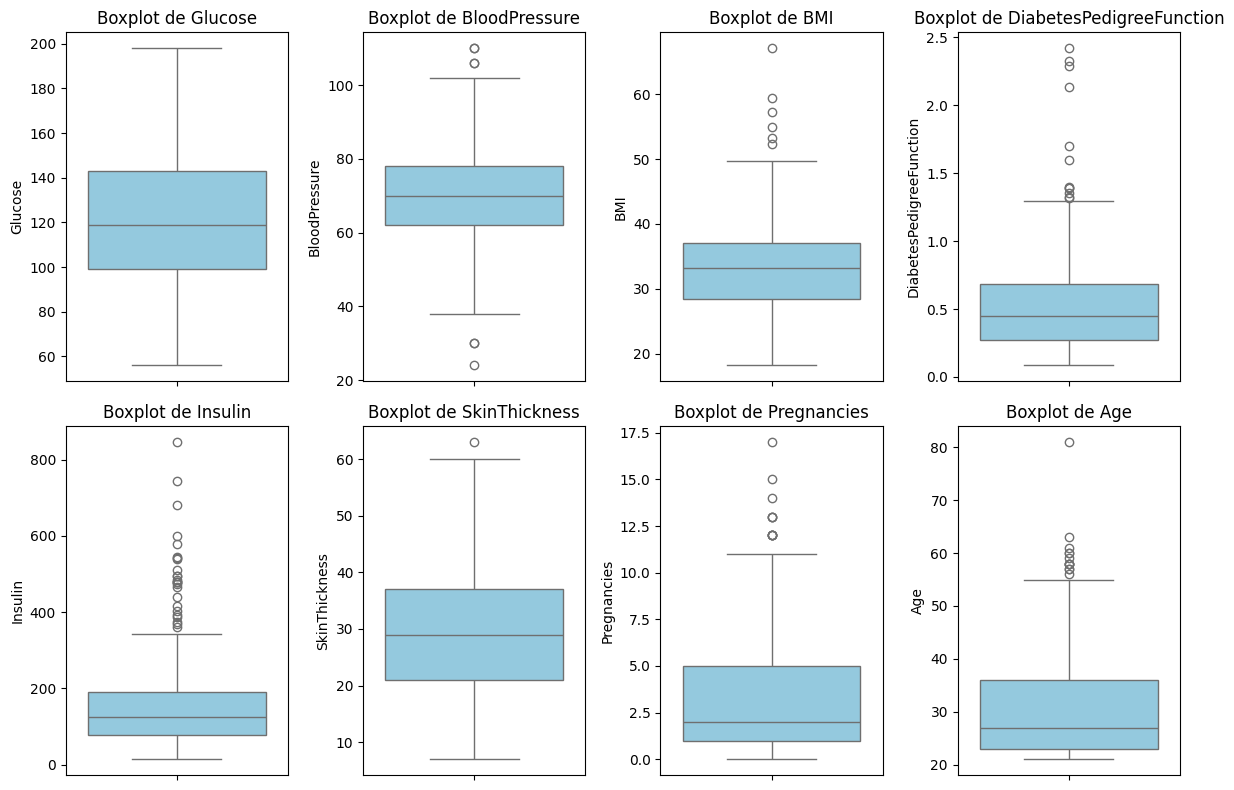

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de colunas numéricas para análise de outliers
colunas_boxplot = ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness', 'Pregnancies', 'Age']

plt.figure(figsize=(12, 8))

# Criar um boxplot para cada variável
for i, col in enumerate(colunas_boxplot, 1):
    plt.subplot(2, 4, i)  # Criando subplots (2 linhas, 4 colunas)
    sns.boxplot(y=df_norm[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()


Com esses gráficos podemos identificar os *outliers* e tratá-los.

##**4. Tratamento de outliers**

###4.1 - Winsorization

Para o tratamento será aplicado a normalização de dados, chamada de *Winsorization*, que substitui os *outliers* pelos limites do *boxplot*

In [ ]:
def remover_outliers(df, colunas):
    for col in colunas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]
    return df

colunas_para_tratar = ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness','Pregnancies','Age']
df = remover_outliers(df, colunas_para_tratar)

Tratando o atributo *DiabetesPedigreeFunction* com a raiz quadrada, uma vez que sua distribuição assimétrica não permite que o

In [ ]:
import numpy as np
df['DiabetesPedigreeFunction'] = np.sqrt(df['DiabetesPedigreeFunction'])

Uma vez normalizado, os *outliers* devem ter sido removidos, para essa verificação, plotamos de novo os gráficos

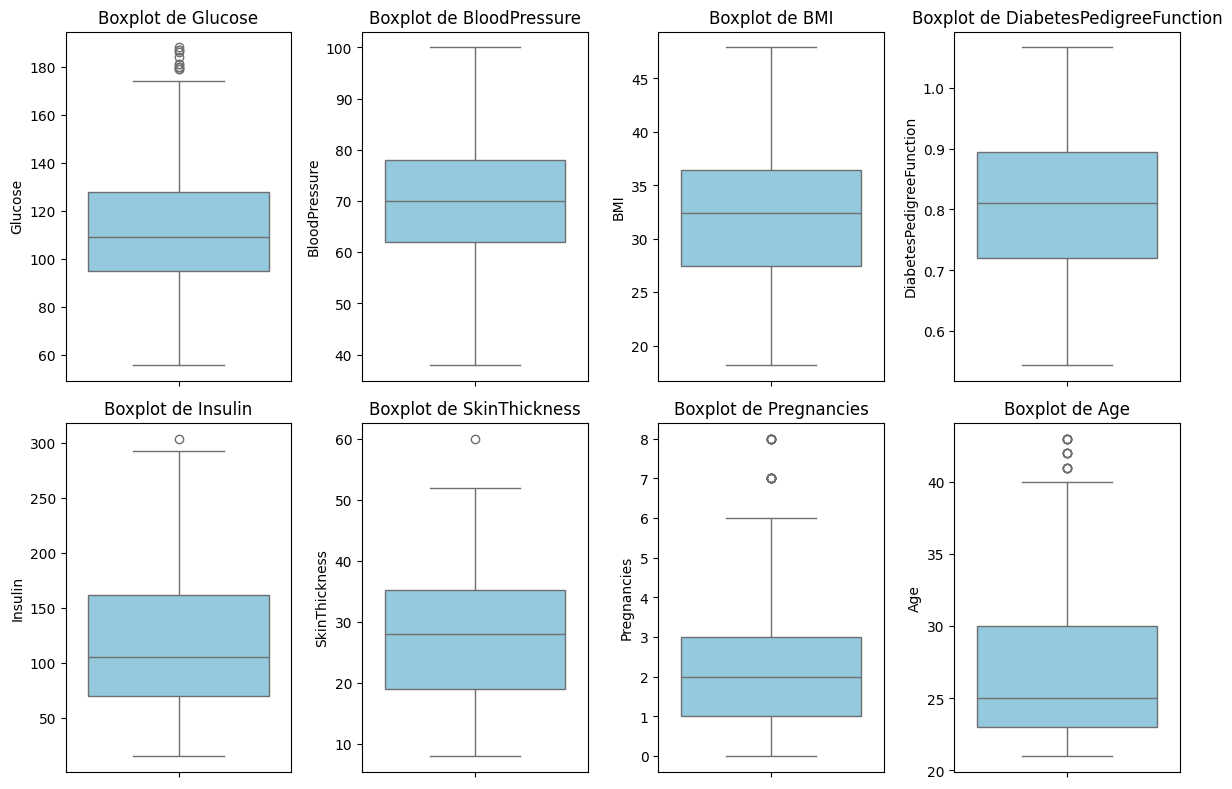

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de colunas numéricas para análise de outliers
colunas_boxplot = ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness', 'Pregnancies', 'Age']

plt.figure(figsize=(12, 8))

# Criar um boxplot para cada variável
for i, col in enumerate(colunas_boxplot, 1):
    plt.subplot(2, 4, i)  # Criando subplots (2 linhas, 4 colunas)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()


##**5 - Aplicando Modelos de Aprendizado de Máquina**

Primeiramente realizamos a distinção dos atributos que são *features* e o atributo alvo. Após isso dividimos a base de dados entre dados para treinamneto do modelo e dados para teste, minha escolha foi uma proporção de 80% treino e 20% teste.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Separação de features e target
X = df_norm.drop(columns=['Outcome'])  # Features
y = df_norm['Outcome']  # Target (Diabético ou Não Diabético)

# Divisão dos dados em treino (80%) e teste (20%) - separa de modo aleatório
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

###5.1 - K-Nearest Neighbors(KNN)

In [ ]:
# Treinamento do modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Número de vizinhos pode ser ajustado
knn.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_knn = knn.predict(X_test)

# Avaliação do modelo
print("Acurácia do KNN:", accuracy_score(y_test, y_pred_knn))
print(f"F1-score médio: {f1_score(y_test, y_pred_knn, average='macro'):.4f}")
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_knn))

Como foi possível ver, devemos fazer um ajuste de parâmetros de modo a tentar melhorar a acurácia obtida. Para tanto, a primeira estratégia é o uso de Validação Cruzada.

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score

# Definindo a estratégia de validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Criando o modelo KNN (você pode testar diferentes valores de k)
knn = KNeighborsClassifier(n_neighbors=5)

# Avaliando com validação cruzada
accuracy_scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='f1_macro')

print("\nResultados da Validação Cruzada:")
print(f"Acurácia média: {accuracy_scores.mean():.4f} (± {accuracy_scores.std():.4f})")
print(f"F1-score médio: {f1_scores.mean():.4f} (± {f1_scores.std():.4f})")

# Agora treinando no conjunto completo de treino e avaliando no teste
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("\nResultados no conjunto de teste:")
print("Acurácia:", accuracy_score(y_test, y_pred))
print(f"F1-score médio: {f1_score(y_test, y_pred, average='macro'):.4f}")
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))